In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
with open("/content/drive/My Drive/Datasets/Traffic_Light/train.p", mode = 'rb') as training_data:
  train = pickle.load(training_data)
with open("/content/drive/My Drive/Datasets/Traffic_Light/valid.p", mode = 'rb') as validation_data:
  valid = pickle.load(validation_data)
with open("/content/drive/My Drive/Datasets/Traffic_Light/test.p", mode = 'rb') as testing_data:
  test = pickle.load(testing_data)

In [3]:
x_train, y_train = train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [4]:
x_train.shape

(34799, 32, 32, 3)

In [5]:
x_validation.shape

(4410, 32, 32, 3)

In [6]:
x_test.shape

(12630, 32, 32, 3)

36

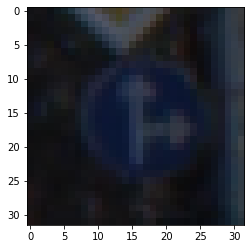

In [7]:
i = 1000
plt.imshow(x_train[i])
y_train[i]

38

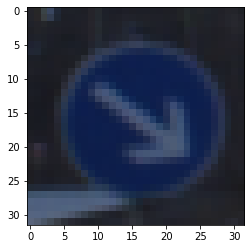

In [8]:
i = 2000
plt.imshow(x_validation[i])
y_validation[i]

17

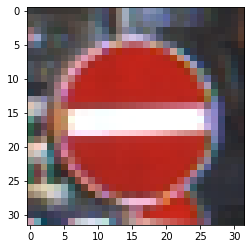

In [9]:
i = 1000
plt.imshow(x_test[i])
y_test[i]

In [10]:
#Data Prepration
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train,y_train)

In [11]:
#convert to rgb to grayscale
x_train_gray = np.sum(x_train/3,axis = 3, keepdims=True)
x_test_gray = np.sum(x_test/3,axis = 3, keepdims=True)
x_validation_gray = np.sum(x_validation/3, axis=3, keepdims=True)

In [12]:
#normalization(range 0 to 1)
x_train_gray_norm = (x_train_gray-128)/128
x_test_gray_norm = (x_test_gray-128)/128
x_validation_gray_norm = (x_validation_gray-128)/128

In [13]:
x_train_gray_norm

array([[[[-0.8671875 ],
         [-0.86458333],
         [-0.86979167],
         ...,
         [-0.890625  ],
         [-0.88541667],
         [-0.88802083]],

        [[-0.875     ],
         [-0.875     ],
         [-0.86197917],
         ...,
         [-0.890625  ],
         [-0.890625  ],
         [-0.88802083]],

        [[-0.86458333],
         [-0.86458333],
         [-0.86458333],
         ...,
         [-0.88541667],
         [-0.88541667],
         [-0.88541667]],

        ...,

        [[-0.8515625 ],
         [-0.84895833],
         [-0.84114583],
         ...,
         [-0.84895833],
         [-0.86458333],
         [-0.85677083]],

        [[-0.8515625 ],
         [-0.84895833],
         [-0.84895833],
         ...,
         [-0.84114583],
         [-0.85416667],
         [-0.8671875 ]],

        [[-0.8515625 ],
         [-0.85677083],
         [-0.84895833],
         ...,
         [-0.84895833],
         [-0.859375  ],
         [-0.86197917]]],


       [[[-0.88541667],


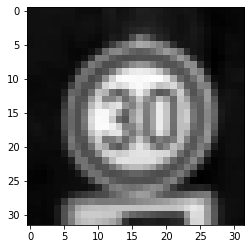

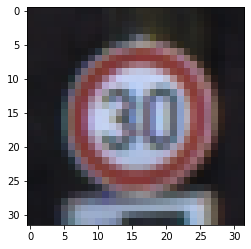

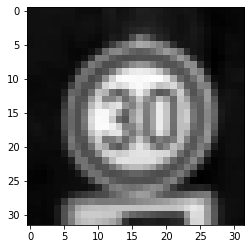

In [14]:
i = 500
plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap = 'gray')


In [48]:
#model training using LE-NET
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard



In [60]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=6, kernel_size = (10,10), activation='relu',input_shape=(32,32,1)))
cnn_model.add(MaxPool2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(10,10), activation='relu'))
cnn_model.add(MaxPool2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=300, activation = 'relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units=200, activation = 'relu'))
cnn_model.add(Dropout(0.10))
cnn_model.add(Dense(units=43,activation='softmax'))

In [61]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.00146), metrics=['accuracy'])

In [62]:
history = cnn_model.fit(x_train_gray_norm, y_train, batch_size = 500, epochs = 200, verbose = 1, validation_data=(x_validation_gray_norm,y_validation))

Epoch 1/200
70/70 [==============================] - 0s 7ms/step - loss: 3.0082 - accuracy: 0.1902 - val_loss: 2.0438 - val_accuracy: 0.4100
Epoch 2/200
70/70 [==============================] - 0s 5ms/step - loss: 1.4072 - accuracy: 0.5796 - val_loss: 1.0052 - val_accuracy: 0.7141
Epoch 3/200
70/70 [==============================] - 0s 5ms/step - loss: 0.8411 - accuracy: 0.7544 - val_loss: 0.7227 - val_accuracy: 0.8023
Epoch 4/200
70/70 [==============================] - 0s 5ms/step - loss: 0.6126 - accuracy: 0.8237 - val_loss: 0.6106 - val_accuracy: 0.8277
Epoch 5/200
70/70 [==============================] - 0s 5ms/step - loss: 0.4983 - accuracy: 0.8596 - val_loss: 0.5477 - val_accuracy: 0.8542
Epoch 6/200
70/70 [==============================] - 0s 5ms/step - loss: 0.4150 - accuracy: 0.8805 - val_loss: 0.4927 - val_accuracy: 0.8667
Epoch 7/200
70/70 [==============================] - 0s 5ms/step - loss: 0.3748 - accuracy: 0.8947 - val_loss: 0.5002 - val_accuracy: 0.8687
Epoch 8/200
7

In [63]:
score  = cnn_model.evaluate(x_test_gray_norm,y_test)
print('Test Accuracy {}'.format(score[1]))

395/395 [==============================] - 1s 2ms/step - loss: 1.1452 - accuracy: 0.9123
Test Accuracy 0.9122723937034607


In [64]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

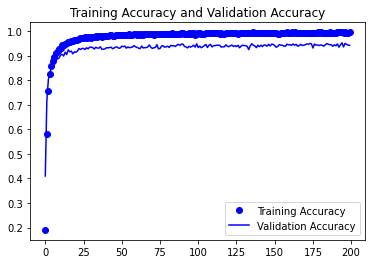

In [65]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
loss = history.history['loss']

epoch = range(len(accuracy))
plt.plot(epoch, accuracy,'bo', label='Training Accuracy')
plt.plot(epoch, val_accuracy,'b', label='Validation Accuracy')
plt.title('Training Accuracy and Validation Accuracy')
plt.legend()

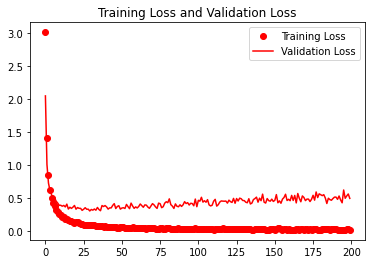

In [66]:
plt.plot(epoch, loss, 'ro', label= 'Training Loss')
plt.plot(epoch, val_loss, 'r', label = 'Validation Loss')
plt.title('Training Loss and Validation Loss')
plt.legend()

In [67]:
predicted_classes = cnn_model.predict_classes(x_test_gray_norm)
y_true = y_test

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,predicted_classes)
print(cm)

[[ 50   0   0 ...   0   0   0]
 [  0 692   1 ...   9   0   0]
 [  0  13 714 ...   0   0   0]
 ...
 [  0   0   1 ...  59   0   1]
 [  0   0   0 ...   0  49   0]
 [  0   0   0 ...   0   4  81]]


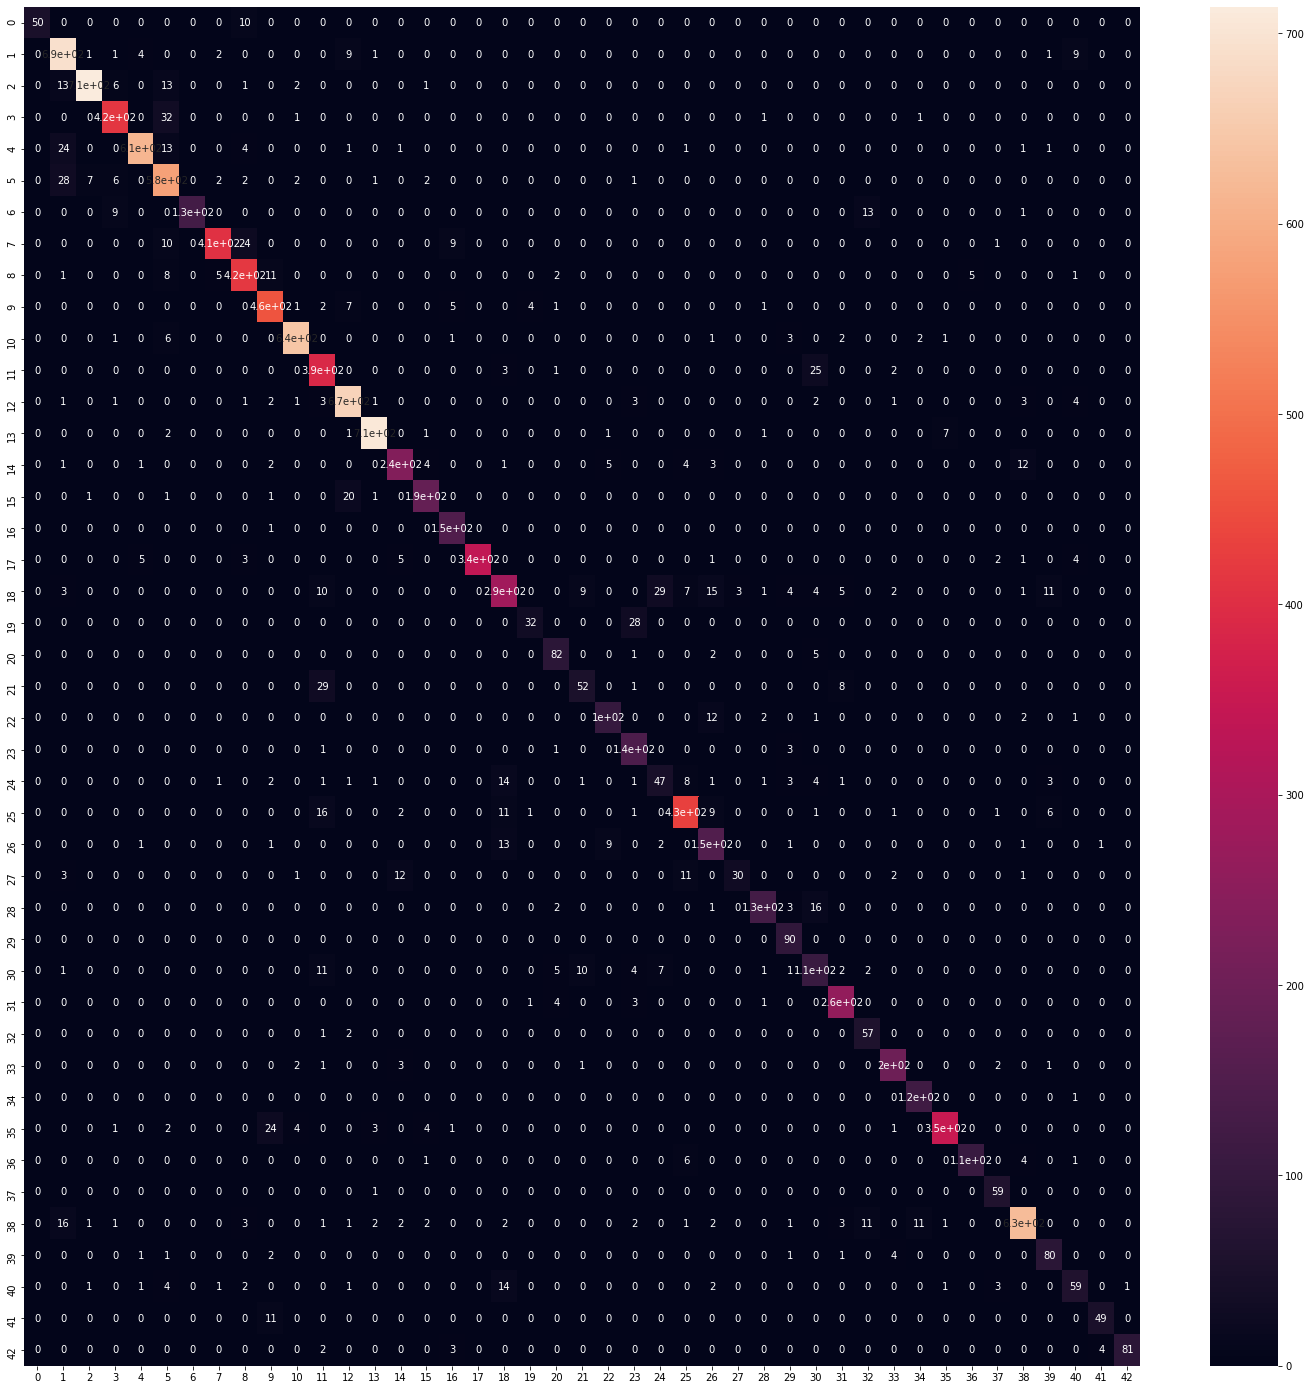

In [69]:
plt.figure(figsize=(25,25))
sns.heatmap(cm, annot = True)

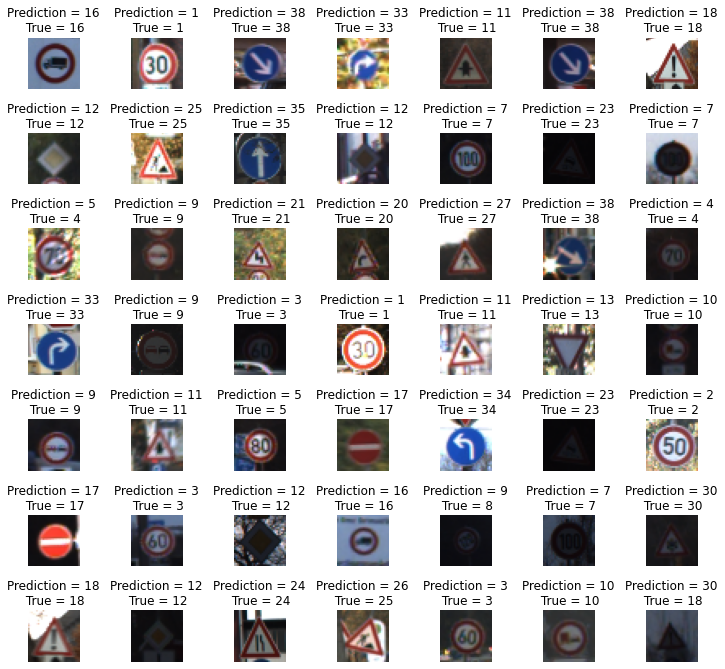

In [70]:
L = 7
W = 7

fig, axes = plt.subplots(L,W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0,L*W):
  axes[i].imshow(x_test[i])
  axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i],y_true[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)